## Demonstration with Breast Cancer Wisconsin Data

### Data Preparation

In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [12]:
# Get the data and its  label from the dataframe
x = df.loc[:, 2:].values
_y = df.loc[:, 1].values
# Peek the data
x.shape, _y.shape, x[:1], _y[:30]

((569, 30),
 (569,),
 array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
           1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
           3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
           7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
           8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
           4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
           3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
           1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
           1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
           2.65400000e-01,   4.60100000e-01,   1.18900000e-01]]),
 array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M'], dtype=object))

In [13]:
# Transform the training label
# M (Malignant) = 1 and B (Benign) = 0
y = np.zeros(_y.shape[0], dtype=int)
y[_y=='M'] = 1
y[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1])

In [14]:
# Divide the data
# Training 70%, Test 30%
n = int(0.7 * x.shape[0])
x_train, y_train = x[:n], y[:n]
x_test, y_test = x[n:], y[n:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

### Logistic Regression at Play

In [15]:
from log_regression import LogisticRegression

In [16]:
# Training with alpha = 0.01
classifier = LogisticRegression(0.001)
classifier.fit(x_train, y_train, 10000)
acc, conf = classifier.evaluate(x_train, y_train, verbose=True)

Accuracy: 0.914572864322
Confusion matrix: 
 [[ 209.   16.]
 [  18.  155.]]


In [17]:
# See the score for test data
acc, conf = classifier.evaluate(x_test, y_test, verbose=True)

Accuracy: 0.883040935673
Confusion matrix: 
 [[ 115.   17.]
 [   3.   36.]]


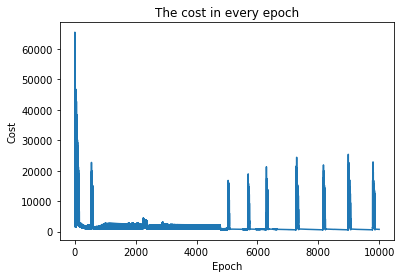

In [18]:
# See the cost log graph
import matplotlib.pyplot as plt 

x = np.arange(len(classifier.cost_log)) + 1
plt.plot(x, classifier.cost_log)
plt.title('The cost in every epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()